## SF2935 Modern methods of statistical learning on KTH
### Project 2
#### By Hannes Kindbom and Viktor Reineck

In [1]:
#Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [2]:
#Read data
df = pd.read_csv("Auto_dataset.csv")

## Part 1

In [3]:
#Modify data
median_mpg = df["mpg"].median()
df["mpg"] = (df["mpg"] > median_mpg).astype(int)
#drop non-numeric data
df = df[df.horsepower.apply(lambda datapoint: datapoint.isnumeric())]
#convert horsepower data to ints
df["horsepower"]  = pd.to_numeric(df["horsepower"])

df.head(15)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,0,8,302.0,140,3449,10.5,70,1,ford torino
5,0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


#### Help functions for training

In [4]:
#Function to analyse test train split
def get_error(clf, df, test_size,  stratify=None):
    train_df, test_df = train_test_split(df, test_size=test_size, random_state=0, stratify=stratify)
    
    df_temp = test_df[test_df.label.apply(lambda datapoint: datapoint<0)]
    print(df_temp.shape)

    
    #column 1 to 4 are the chosen features and column 0 is the response (mpg)
    X_train = train_df.iloc[:, 1:4].values
    Y_train = train_df.iloc[:, 0].values

    X_test = test_df.iloc[:, 1:4].values
    Y_test = test_df.iloc[:, 0].values
    
    clf.fit(X_train,Y_train)
    training_error = 1 - clf.score(X_train,Y_train)
    test_error = 1 - clf.score(X_test,Y_test)
    
    print('test size: ' + str(test_size))
    print('test error: ' + str(test_error))
    print('training error: ' + str(training_error) + '\n')
    return training_error, test_error

In [5]:
#plot errors and function of test sizes for a classifier
def plot_errors_for_test_sizes(clf, df, test_sizes):
    training_errors = []
    test_errors = []
   
    for test_size in test_sizes:
        training_error, test_error = get_error(clf, df, test_size)
        training_errors.append(training_error)
        test_errors.append(test_error)
    
    plt.figure(figsize=(12, 8))
    plt.plot(test_sizes, test_errors, 'r',label = "Test Error")
    plt.plot(test_sizes, training_errors, 'b',label = "Training Error")
    plt.legend(loc="upper right")
    plt.title("Analysis of Test Size: ")

    plt.ylabel('Errors')
    plt.xlabel('Test Size')
    plt.show()


### Train model with different parameters, kernels and costs

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=False, tol=0.001, verbose=False)
cost: 1
test size: 0.05
test error: 0.19999999999999996
training error: 0.018817204301075252

test size: 0.1
test error: 0.19999999999999996
training error: 0.017045454545454586

test size: 0.15
test error: 0.18644067796610164
training error: 0.018018018018018056

test size: 0.2
test error: 0.1392405063291139
training error: 0.019169329073482455

test size: 0.25
test error: 0.18367346938775508
training error: 0.013605442176870763

test size: 0.3
test error: 0.22881355932203384
training error: 0.010948905109489093



/home/hannes/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/hannes/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/hannes/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/hannes/anaconda3/lib/python3.7/site-packages/skle

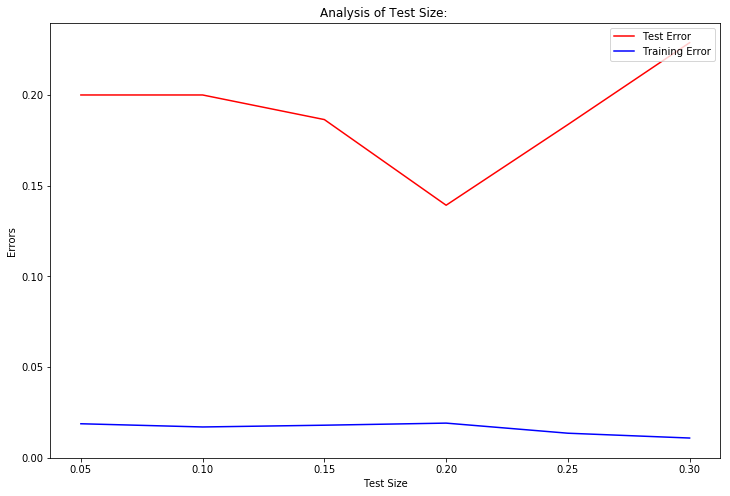

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=False, tol=0.001, verbose=False)
cost: 1
test size: 0.05
test error: 0.19999999999999996
training error: 0.018817204301075252

test size: 0.1
test error: 0.19999999999999996
training error: 0.017045454545454586

test size: 0.15
test error: 0.18644067796610164
training error: 0.018018018018018056

test size: 0.2
test error: 0.1392405063291139
training error: 0.019169329073482455

test size: 0.25
test error: 0.18367346938775508
training error: 0.013605442176870763

test size: 0.3
test error: 0.22881355932203384
training error: 0.010948905109489093



/home/hannes/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/hannes/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/hannes/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/hannes/anaconda3/lib/python3.7/site-packages/skle

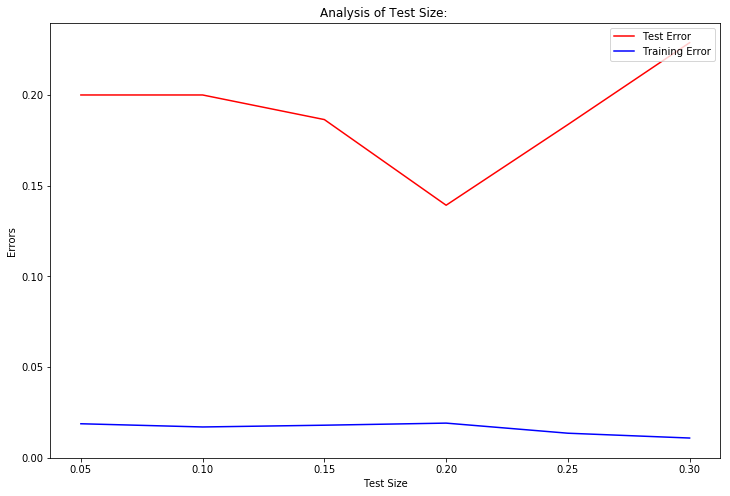

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=False, tol=0.001, verbose=False)
cost: 1


/home/hannes/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


test size: 0.05
test error: 0.19999999999999996
training error: 0.018817204301075252

test size: 0.1
test error: 0.19999999999999996
training error: 0.017045454545454586

test size: 0.15
test error: 0.18644067796610164
training error: 0.018018018018018056

test size: 0.2
test error: 0.1392405063291139
training error: 0.019169329073482455

test size: 0.25
test error: 0.18367346938775508
training error: 0.013605442176870763

test size: 0.3
test error: 0.22881355932203384
training error: 0.010948905109489093



/home/hannes/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/hannes/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/hannes/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/hannes/anaconda3/lib/python3.7/site-packages/skle

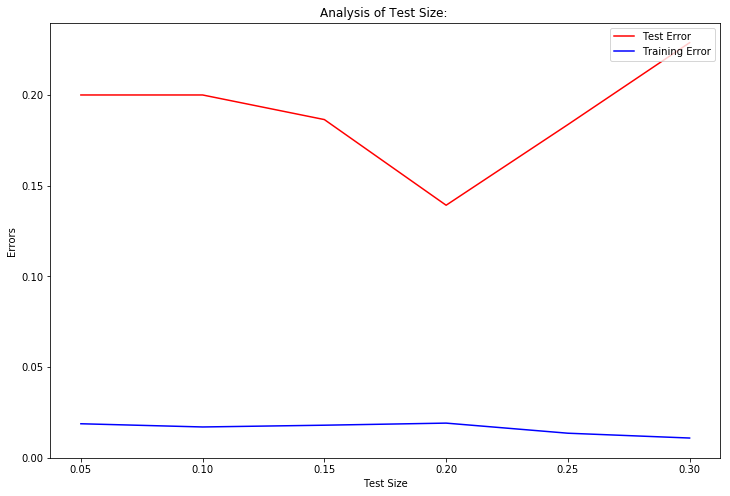

In [6]:
test_sizes = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]

kernels = ['rbf', 'linear', 'sigmoid']
cost = 1

for kernel in kernels:
    SVM_clf = SVC(shrinking = False, C = cost)
    print(SVM_clf)
    print('cost: '+str(cost))
    plot_errors_for_test_sizes(SVM_clf, df, test_sizes)


## Creating synthetic data

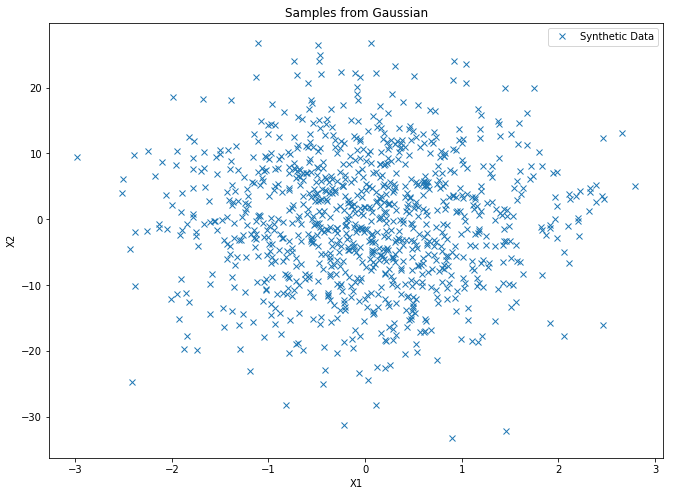

In [10]:
#Sampe from Gaussian
np.random.seed(10)
N = 1000
mean = [0, 0]
cov = [[1, 0], [0, 100]]  # diagonal covariance

X1, X2 = np.random.multivariate_normal(mean, cov, N).T

plt.figure(figsize=(11, 8))
plt.plot(X1, X2, 'x',label = "Synthetic Data")
plt.legend(loc="upper right")
plt.title("Samples from Gaussian")
plt.ylabel('X2')
plt.xlabel('X1')
plt.show()

### Create dataframe and separate into two classes

In [11]:
# Feature map of x to 

# Obtain array of square of each element in X1 and X2
squarer = lambda t: t ** 2
X1_squared = np.array([squarer(xi) for xi in X1])
X2_squared = np.array([squarer(xi) for xi in X2])

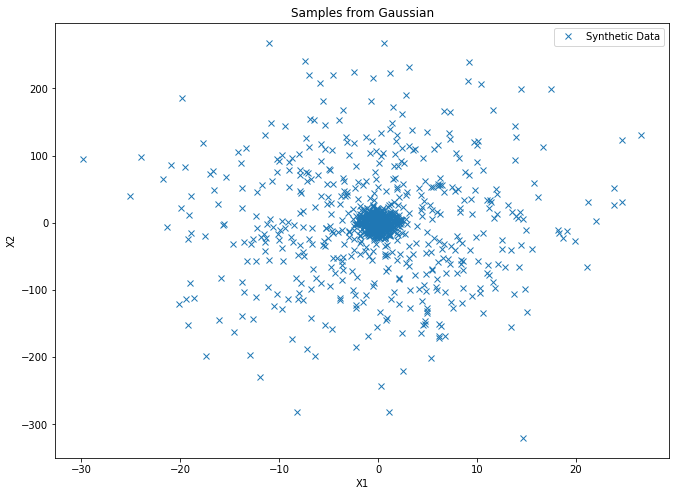

,label,X1,X2
0,1,7.152790,133.158650
1,1,-0.083838,-154.540029
2,1,-7.200856,62.133597
3,1,1.085485,26.551159
4,1,-1.746002,0.429143


In [12]:
#scale vectors
k = 0.5 # fraction of dataset to scale
r = 10
N_1 = k * X1.size
N_1 = int(N_1)

X1[:N_1] = X1[:N_1]*r 
X2[:N_1] = X2[:N_1]*r
X1_squared[:N_1] = X1_squared[:N_1]*r 
X2_squared[:N_1] = X2_squared[:N_1]*r

plt.figure(figsize=(11, 8))
plt.plot(X1, X2, 'x',label = "Synthetic Data")
plt.legend(loc="upper right")
plt.title("Samples from Gaussian")
plt.ylabel('X2')
plt.xlabel('X1')
plt.show()


# Create labels and put data in dataframe
labels_1 = np.full((N_1), 1, dtype=int)
labels_minus_1 = np.full((X1.size - N_1), -1, dtype=int)
labels = np.concatenate([labels_1, labels_minus_1])

generated_df = pd.DataFrame({'label': labels, 'X1': X1, 'X2': X2})
generated_df_map = pd.DataFrame({'label': labels, 'X1': X1, 'X2': X2, 'X1_sq':X1_squared, 'X2_sq': X2_squared})

generated_df.head()

### Make test and training set

In [13]:
nr_classes = 2
test_data_per_class = 100
test_size = nr_classes * test_data_per_class / N

### Train SVM on synthetic data

In [15]:
kernel = 'linear'
cost = 1
gamma = 'auto'

SVM_clf = SVC(shrinking = False, C = cost, gamma = gamma, kernel = kernel)
get_error(SVM_clf, generated_df, test_size, stratify=labels)

print(SVM_clf)

(100, 3)
test size: 0.2
test error: 0.41000000000000003
training error: 0.4

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=False,
  tol=0.001, verbose=False)


In [14]:
# with feature map
kernel = 'linear'
cost = 1
gamma = 'auto'

SVM_clf = SVC(shrinking = False, C = cost, gamma = gamma, kernel = kernel)
get_error(SVM_clf, generated_df_map, test_size, stratify=labels)

print(SVM_clf)

(100, 5)
test size: 0.2
test error: 0.22499999999999998
training error: 0.28625

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=False,
  tol=0.001, verbose=False)
